### **[Python and REST APIs: Interacting With Web Services](https://realpython.com/api-integration-in-python/)**

- **[Stateless_HTTP](https://inpa.tistory.com/entry/WEB-%F0%9F%93%9A-Stateful-Stateless-%EC%A0%95%EB%A6%AC)**

#### REST는 API 설계의 원칙과 규칙을 제공(like 고딕양식)
#### HTTP 프로토콜 사용: REST API는 HTTP 요청을 사용하여 데이터를 전송하고 수신
#### 표준 HTTP 메소드(GET, POST, PUT, DELETE 등)를 사용하여 자원을 생성, 조회, 수정, 삭제

In [1]:
import requests

# REST API point 예
response = requests.get('https://api.github.com/users/realpython')
print(response)

<Response [200]>


### **Status Codes**
- Once a REST API receives and processes an HTTP request, it will return an **HTTP response**. Included in this response is an **HTTP status code**. Below is a list of the most common status codes returned by REST APIs:

| Code | Meaning                  | Description                                                           |
|------|--------------------------|-----------------------------------------------------------------------|
| 200  | OK                       | The requested action was successful.                                  |
| 201  | Created                  | A new resource was created.                                           |
| 202  | Accepted                 | The request was received, but no modification has been made yet.      |
| 204  | No Content               | The request was successful, but the response has no content.          |
| 400  | Bad Request              | The request was malformed.                                            |
| 401  | Unauthorized             | The client is not authorized to perform the requested action.         |
| 404  | Not Found                | The requested resource was not found.                                 |
| 415  | Unsupported Media Type   | The request data format is not supported by the server.               |
| 422  | Unprocessable Entity     | The request data was properly formatted but contained invalid or missing data. |
| 500  | Internal Server Error    | The server threw an error when processing the request.                |

In [2]:
response.json()

{'login': 'realpython',
 'id': 5448020,
 'node_id': 'MDEyOk9yZ2FuaXphdGlvbjU0NDgwMjA=',
 'avatar_url': 'https://avatars.githubusercontent.com/u/5448020?v=4',
 'gravatar_id': '',
 'url': 'https://api.github.com/users/realpython',
 'html_url': 'https://github.com/realpython',
 'followers_url': 'https://api.github.com/users/realpython/followers',
 'following_url': 'https://api.github.com/users/realpython/following{/other_user}',
 'gists_url': 'https://api.github.com/users/realpython/gists{/gist_id}',
 'starred_url': 'https://api.github.com/users/realpython/starred{/owner}{/repo}',
 'subscriptions_url': 'https://api.github.com/users/realpython/subscriptions',
 'organizations_url': 'https://api.github.com/users/realpython/orgs',
 'repos_url': 'https://api.github.com/users/realpython/repos',
 'events_url': 'https://api.github.com/users/realpython/events{/privacy}',
 'received_events_url': 'https://api.github.com/users/realpython/received_events',
 'type': 'Organization',
 'site_admin': False

### **json to dataframe**

In [3]:
import pandas as pd
pd.DataFrame([response.json()])

,login,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,gists_url,...,email,hireable,bio,twitter_username,public_repos,public_gists,followers,following,created_at,updated_at
0,realpython,5448020,MDEyOk9yZ2FuaXphdGlvbjU0NDgwMjA=,https://avatars.githubusercontent.com/u/544802...,,https://api.github.com/users/realpython,https://github.com/realpython,https://api.github.com/users/realpython/followers,https://api.github.com/users/realpython/follow...,https://api.github.com/users/realpython/gists{...,...,info@realpython.com,None,"Online Python Training: tutorials, video cours...",None,111,0,2113,0,2013-09-12T23:06:33Z,2024-03-12T20:11:34Z


In [4]:
pd.json_normalize(response.json())

,login,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,gists_url,...,email,hireable,bio,twitter_username,public_repos,public_gists,followers,following,created_at,updated_at
0,realpython,5448020,MDEyOk9yZ2FuaXphdGlvbjU0NDgwMjA=,https://avatars.githubusercontent.com/u/544802...,,https://api.github.com/users/realpython,https://github.com/realpython,https://api.github.com/users/realpython/followers,https://api.github.com/users/realpython/follow...,https://api.github.com/users/realpython/gists{...,...,info@realpython.com,None,"Online Python Training: tutorials, video cours...",None,111,0,2113,0,2013-09-12T23:06:33Z,2024-03-12T20:11:34Z


## **[pandas.read_json](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html)**

In [5]:
df = pd.DataFrame([['a', 'b'], ['c', 'd']],
                  index=['row 1', 'row 2'],
                  columns=['col 1', 'col 2'])
df

,col 1,col 2
row 1,a,b
row 2,c,d


## **orient='split', parsing**

In [6]:
json_str = df.to_json(orient='split')
print(json_str)
print(type(json_str))
json_str

{"columns":["col 1","col 2"],"index":["row 1","row 2"],"data":[["a","b"],["c","d"]]}
<class 'str'>


'{"columns":["col 1","col 2"],"index":["row 1","row 2"],"data":[["a","b"],["c","d"]]}'

### **텍스트(text) I/O, 바이너리(binary) I/O** 및 원시(raw) I/O.
- 이들은 일반적인 범주이며 다양한 배경 저장소를 각각에 사용하며 이러한 범주 중 하나에 속하는 구상 객체를 파일 객체(**file object**)
- 파일객체(file object)는 다른 일반적인 용어는 스트림(**stream**)과 파일류 객체(**file-like object**)

In [7]:
from io import StringIO

# _ is a placeholder for the JSON string produced by df.to_json(orient='split').
# StringIO(_) is used to convert the JSON string into a file-like object, which pd.read_json can read from.
#
pd.read_json(StringIO(json_str), orient='split')

,col 1,col 2
row 1,a,b
row 2,c,d


### **parsing**하면 dictionary type, parse the string using a JSON parser
- **json.loads()**

In [8]:
import json

json_dict = json.loads(json_str)  # parsing하면 dictionary type, parse the string using a JSON parser
print(json_dict)
print(type(json_dict))

json_dict

{'columns': ['col 1', 'col 2'], 'index': ['row 1', 'row 2'], 'data': [['a', 'b'], ['c', 'd']]}
<class 'dict'>


{'columns': ['col 1', 'col 2'],
 'index': ['row 1', 'row 2'],
 'data': [['a', 'b'], ['c', 'd']]}

### **Parsing** a CSV file means reading the file and converting it into a structured format like Pandas DataFrame.
- **pd.read_csv(StringIO(stream or file-like object))**
- **pd.read_csv('text.csv')**

In [9]:
csv_data = """name,age,city
John,30,New York
Jane,25,San Francisco"""

pd.read_csv(StringIO(csv_data))  # 문자열을 파일객체처럼 만들고 pd.read_csv 함수로 dataframe형태로 parse

,name,age,city
0,John,30,New York
1,Jane,25,San Francisco


In [11]:
pd.read_csv(csv_data) # csv_data는 string이라 못 읽는다.

FileNotFoundError: [Errno 2] No such file or directory: 'name,age,city\nJohn,30,New York\nJane,25,San Francisco'

### **[io — Core tools for working with streams](https://docs.python.org/3/library/io.html)**
- FileNotFoundError: [Errno 2] No such file or directory 오류는 pd.read_csv()가 파일 경로 또는 파일과 유사한 객체(file-like object)를 기대하기 때문에 발생하며, 이 함수는 CSV 데이터 처럼 생긴 일반 문자열을 직접 처리하지 않는다.

- 문자열에서 CSV 데이터를 읽으려면 io 모듈의 StringIO를 사용해야 하는데, StringIO는 문자열에서 메모리 내 파일과 유사한 객체를 생성하니 그런 다음 pd.read_csv()가 이 객체를 읽을 수 있다.

In [12]:
type(csv_data)

str

In [13]:
type(StringIO(csv_data))

_io.StringIO

In [14]:
csv_data.read()

AttributeError: 'str' object has no attribute 'read'

In [15]:
StringIO(csv_data).read()

'name,age,city\nJohn,30,New York\nJane,25,San Francisco'

In [16]:
dir(StringIO(csv_data))

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_checkClosed',
 '_checkReadable',
 '_checkSeekable',
 '_checkWritable',
 'close',
 'closed',
 'detach',
 'encoding',
 'errors',
 'fileno',
 'flush',
 'getvalue',
 'isatty',
 'line_buffering',
 'newlines',
 'read',
 'readable',
 'readline',
 'readlines',
 'seek',
 'seekable',
 'tell',
 'truncate',
 'writable',
 'write',
 'writelines']

In [18]:
'. '.join(dir(csv_data))

'__add__. __class__. __contains__. __delattr__. __dir__. __doc__. __eq__. __format__. __ge__. __getattribute__. __getitem__. __getnewargs__. __gt__. __hash__. __init__. __init_subclass__. __iter__. __le__. __len__. __lt__. __mod__. __mul__. __ne__. __new__. __reduce__. __reduce_ex__. __repr__. __rmod__. __rmul__. __setattr__. __sizeof__. __str__. __subclasshook__. capitalize. casefold. center. count. encode. endswith. expandtabs. find. format. format_map. index. isalnum. isalpha. isascii. isdecimal. isdigit. isidentifier. islower. isnumeric. isprintable. isspace. istitle. isupper. join. ljust. lower. lstrip. maketrans. partition. removeprefix. removesuffix. replace. rfind. rindex. rjust. rpartition. rsplit. rstrip. split. splitlines. startswith. strip. swapcase. title. translate. upper. zfill'

In [19]:
StringIO(csv_data).read()

'name,age,city\nJohn,30,New York\nJane,25,San Francisco'

### **with statement**

In [20]:
with StringIO(csv_data) as string_io:
    df = pd.read_csv(string_io)

df

,name,age,city
0,John,30,New York
1,Jane,25,San Francisco


In [23]:
with StringIO(csv_data) :
    df = pd.read_csv(StringIO(csv_data))

df

,name,age,city
0,John,30,New York
1,Jane,25,San Francisco


In [21]:
with StringIO(csv_data) as string_io:
    print(string_io.read())       # 파일 맨 끝에 위치
    df =  pd.read_csv(string_io)

name,age,city
John,30,New York
Jane,25,San Francisco


EmptyDataError: No columns to parse from file

## **orient='index'**

In [24]:
df.to_json(orient='index')

'{"0":{"name":"John","age":30,"city":"New York"},"1":{"name":"Jane","age":25,"city":"San Francisco"}}'

In [25]:
# _ is a placeholder for the JSON string produced by df.to_json(orient='index').
pd.read_json(StringIO(_), orient='index')

,name,age,city
0,John,30,New York
1,Jane,25,San Francisco


## **orient='records'**

In [26]:
df.to_json(orient='records')

'[{"name":"John","age":30,"city":"New York"},{"name":"Jane","age":25,"city":"San Francisco"}]'

In [27]:
pd.read_json(StringIO(_), orient='records')

,name,age,city
0,John,30,New York
1,Jane,25,San Francisco


### **REST APIs and Web Services**
- A REST web service is any web service that adheres to REST architecture constraints.
- REST APIs listen for **HTTP methods(requests)** like GET, POST, and DELETE to know which operations to perform on the web service’s **resources**.

| HTTP method | Description                           |
|-------------|---------------------------------------|
| GET         | Retrieve an existing resource.        |
| POST        | Create a new resource.                |
| PUT         | Update an existing resource.          |
| PATCH       | Partially update an existing resource.|
| DELETE      | Delete a resource.                    |


## **1. GET**
### **read-only** operation

In [28]:
import requests
api_url = "https://jsonplaceholder.typicode.com/todos/1"
response = requests.get(api_url)
response.json()

{'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'completed': False}

In [29]:
print(type(response.json()))

<class 'dict'>


In [30]:
response.status_code

200

In [31]:
response.headers

{'Date': 'Thu, 30 May 2024 22:50:17 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Report-To': '{"group":"heroku-nel","max_age":3600,"endpoints":[{"url":"https://nel.heroku.com/reports?ts=1713202079&sid=e11707d5-02a7-43ef-b45e-2cf4d2036f7d&s=I7IPwu6lHIF1Ec08uyp3D%2B7e9jEyk%2BXgdivj5jrdaKY%3D"}]}', 'Reporting-Endpoints': 'heroku-nel=https://nel.heroku.com/reports?ts=1713202079&sid=e11707d5-02a7-43ef-b45e-2cf4d2036f7d&s=I7IPwu6lHIF1Ec08uyp3D%2B7e9jEyk%2BXgdivj5jrdaKY%3D', 'Nel': '{"report_to":"heroku-nel","max_age":3600,"success_fraction":0.005,"failure_fraction":0.05,"response_headers":["Via"]}', 'X-Powered-By': 'Express', 'X-Ratelimit-Limit': '1000', 'X-Ratelimit-Remaining': '999', 'X-Ratelimit-Reset': '1713202132', 'Vary': 'Origin, Accept-Encoding', 'Access-Control-Allow-Credentials': 'true', 'Cache-Control': 'max-age=43200', 'Pragma': 'no-cache', 'Expires': '-1', 'X-Content-Type-Options': 'nosniff', 'Etag': 'W/"53

In [32]:
response.headers.keys()

KeysView({'Date': 'Thu, 30 May 2024 22:50:17 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Report-To': '{"group":"heroku-nel","max_age":3600,"endpoints":[{"url":"https://nel.heroku.com/reports?ts=1713202079&sid=e11707d5-02a7-43ef-b45e-2cf4d2036f7d&s=I7IPwu6lHIF1Ec08uyp3D%2B7e9jEyk%2BXgdivj5jrdaKY%3D"}]}', 'Reporting-Endpoints': 'heroku-nel=https://nel.heroku.com/reports?ts=1713202079&sid=e11707d5-02a7-43ef-b45e-2cf4d2036f7d&s=I7IPwu6lHIF1Ec08uyp3D%2B7e9jEyk%2BXgdivj5jrdaKY%3D', 'Nel': '{"report_to":"heroku-nel","max_age":3600,"success_fraction":0.005,"failure_fraction":0.05,"response_headers":["Via"]}', 'X-Powered-By': 'Express', 'X-Ratelimit-Limit': '1000', 'X-Ratelimit-Remaining': '999', 'X-Ratelimit-Reset': '1713202132', 'Vary': 'Origin, Accept-Encoding', 'Access-Control-Allow-Credentials': 'true', 'Cache-Control': 'max-age=43200', 'Pragma': 'no-cache', 'Expires': '-1', 'X-Content-Type-Options': 'nosniff', 'Etag

In [33]:
for i in response.headers.keys():
    print(i)

Date
Content-Type
Transfer-Encoding
Connection
Report-To
Reporting-Endpoints
Nel
X-Powered-By
X-Ratelimit-Limit
X-Ratelimit-Remaining
X-Ratelimit-Reset
Vary
Access-Control-Allow-Credentials
Cache-Control
Pragma
Expires
X-Content-Type-Options
Etag
Via
CF-Cache-Status
Age
Server
CF-RAY
Content-Encoding
alt-svc


In [34]:
response.headers["Content-Type" ]

'application/json; charset=utf-8'

## **2. POST**

In [39]:
import requests
api_url = "https://jsonplaceholder.typicode.com/todos"
todo = {"userId": 1, "title": "Buy milk", "completed": False}
response = requests.post(api_url, json=todo)
response.json()

{'userId': 1, 'title': 'Buy milk', 'completed': False, 'id': 201}

In [40]:
response.status_code

201

In [41]:
import requests
import json
api_url = "https://jsonplaceholder.typicode.com/todos"
todo = {"userId": 1, "title": "Buy milk", "completed": True}

headers =  {"Content-Type":"application/json"}
response = requests.post(api_url, data=json.dumps(todo), headers=headers)
response.json()

{'userId': 1, 'title': 'Buy milk', 'completed': True, 'id': 201}

In [42]:
response.status_code

201

In [43]:
# 실습사이트라 실제 데이터가 반영되지는 않음
api_url = "https://jsonplaceholder.typicode.com/todos/201"
requests.get(api_url).json()

{}

- The jsonplaceholder.typicode.com API is a **mock service** designed for testing and prototyping.
- It returns pre-defined responses and does not actually create unique resources.
- This is why the id value is the same (201) for both POST requests.

## **3. PUT**
- put은 전체 리소스를 완전히 업데이트할 때 사용

In [44]:
import requests
api_url = "https://jsonplaceholder.typicode.com/todos/10"
response = requests.get(api_url)
response.json()

{'userId': 1,
 'id': 10,
 'title': 'illo est ratione doloremque quia maiores aut',
 'completed': True}

In [45]:
todo = {"userId": 1, "title": "Wash car", "completed": True}
response = requests.put(api_url, json=todo)
response.json()

{'userId': 1, 'title': 'Wash car', 'completed': True, 'id': 10}

In [46]:
response.status_code

200

In [47]:
# 실습사이트라 실제 데이터가 반영되지는 않음
api_url = "https://jsonplaceholder.typicode.com/todos/1"
response = requests.get(api_url)
response.json()

{'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'completed': False}

## **4. Patch**
- patch는 리소스의 부분적인 업데이트를 원할 때 사용

In [48]:
import requests
api_url = "https://jsonplaceholder.typicode.com/todos/10"
todo = {"title": "Mow lawn"}
response = requests.patch(api_url, json=todo)
response.json()

{'userId': 1, 'id': 10, 'title': 'Mow lawn', 'completed': True}

In [49]:
response.status_code

200

## **5. DELETE**

In [50]:
import requests
api_url = "https://jsonplaceholder.typicode.com/todos/10"
response = requests.delete(api_url)
response.json()

{}

In [51]:
response.status_code

200

### **Pick Your Data Interchange Format**
- Two popular options for formatting web service data are **XML** and **JSON**.

In [52]:
%%writefile book.xml
<?xml version="1.0" encoding="UTF-8" ?>
<book>
    <title>Python Basics</title>
    <page_count>635</page_count>
    <pub_date>2021-03-16</pub_date>
    <authors>
        <author>
            <name>David Amos</name>
        </author>
        <author>
            <name>Joanna Jablonski</name>
        </author>
        <author>
            <name>Dan Bader</name>
        </author>
        <author>
            <name>Fletcher Heisler</name>
        </author>
    </authors>
    <isbn13>978-1775093329</isbn13>
    <genre>Education</genre>
</book>

Writing book.xml


In [53]:
%%writefile book.json
 {
    "title": "Python Basics",
    "page_count": 635,
    "pub_date": "2021-03-16",
    "authors": [
        {"name": "David Amos"},
        {"name": "Joanna Jablonski"},
        {"name": "Dan Bader"},
        {"name": "Fletcher Heisler"}
    ],
    "isbn13": "978-1775093329",
    "genre": "Education"
}

Writing book.json


In [54]:
# prompt: book.xml 을 데이터프레임으로 읽기
! pip install xmltodict

import xmltodict

# Read the XML file
with open("book.xml", "r") as xml_file:
    xml_data = xml_file.read()

# Convert the XML data to a dictionary
dict_data = xmltodict.parse(xml_data)

# Convert the dictionary to a DataFrame
df = pd.DataFrame(dict_data["book"])
df


,title,page_count,pub_date,authors,isbn13,genre
author,Python Basics,635,2021-03-16,"[{'name': 'David Amos'}, {'name': 'Joanna Jabl...",978-1775093329,Education


In [55]:
# prompt: book.json을 데이터프레임으로 읽기

import pandas as pd
import json

# Read the JSON file
with open("book.json", "r") as json_file:
    json_data = json.load(json_file)

# Convert the JSON data to a DataFrame
df = pd.DataFrame(json_data)
df

,title,page_count,pub_date,authors,isbn13,genre
0,Python Basics,635,2021-03-16,{'name': 'David Amos'},978-1775093329,Education
1,Python Basics,635,2021-03-16,{'name': 'Joanna Jablonski'},978-1775093329,Education
2,Python Basics,635,2021-03-16,{'name': 'Dan Bader'},978-1775093329,Education
3,Python Basics,635,2021-03-16,{'name': 'Fletcher Heisler'},978-1775093329,Education


In [56]:
df.authors = df.authors.apply(lambda x : x.get('name'))
df

,title,page_count,pub_date,authors,isbn13,genre
0,Python Basics,635,2021-03-16,David Amos,978-1775093329,Education
1,Python Basics,635,2021-03-16,Joanna Jablonski,978-1775093329,Education
2,Python Basics,635,2021-03-16,Dan Bader,978-1775093329,Education
3,Python Basics,635,2021-03-16,Fletcher Heisler,978-1775093329,Education


### REST는 API 설계의 원칙과 규칙을 제공하는 반면, FastAPI는 이러한 원칙을 실현할 수 있는 프레임워크를 제공
### HTTP 프로토콜 사용: REST API와 FastAPI 모두 HTTP 요청을 사용하여 데이터를 전송하고 수신하며, 표준 HTTP 메소드(GET, POST, PUT, DELETE 등)를 사용하여 자원을 생성, 조회, 수정, 삭제

### **과제**

In [57]:
response = requests.get("https://api.thecatapi.com/v1/breeds")
data = response.json()

In [58]:
# prompt: response.json()을 데이터프레임으로 읽으려면

import pandas as pd
df = pd.DataFrame(data)
df.head()

,weight,id,name,cfa_url,vetstreet_url,vcahospitals_url,temperament,origin,country_codes,country_code,...,natural,rare,rex,suppressed_tail,short_legs,wikipedia_url,hypoallergenic,reference_image_id,cat_friendly,bidability
0,"{'imperial': '7 - 10', 'metric': '3 - 5'}",abys,Abyssinian,http://cfa.org/Breeds/BreedsAB/Abyssinian.aspx,http://www.vetstreet.com/cats/abyssinian,https://vcahospitals.com/know-your-pet/cat-bre...,"Active, Energetic, Independent, Intelligent, G...",Egypt,EG,EG,...,1,0,0,0,0,https://en.wikipedia.org/wiki/Abyssinian_(cat),0,0XYvRd7oD,NaN,NaN
1,"{'imperial': '7 - 10', 'metric': '3 - 5'}",aege,Aegean,NaN,http://www.vetstreet.com/cats/aegean-cat,NaN,"Affectionate, Social, Intelligent, Playful, Ac...",Greece,GR,GR,...,0,0,0,0,0,https://en.wikipedia.org/wiki/Aegean_cat,0,ozEvzdVM-,NaN,NaN
2,"{'imperial': '7 - 16', 'metric': '3 - 7'}",abob,American Bobtail,http://cfa.org/Breeds/BreedsAB/AmericanBobtail...,http://www.vetstreet.com/cats/american-bobtail,https://vcahospitals.com/know-your-pet/cat-bre...,"Intelligent, Interactive, Lively, Playful, Sen...",United States,US,US,...,0,0,0,1,0,https://en.wikipedia.org/wiki/American_Bobtail,0,hBXicehMA,NaN,NaN
3,"{'imperial': '5 - 10', 'metric': '2 - 5'}",acur,American Curl,http://cfa.org/Breeds/BreedsAB/AmericanCurl.aspx,http://www.vetstreet.com/cats/american-curl,https://vcahospitals.com/know-your-pet/cat-bre...,"Affectionate, Curious, Intelligent, Interactiv...",United States,US,US,...,0,0,0,0,0,https://en.wikipedia.org/wiki/American_Curl,0,xnsqonbjW,NaN,NaN
4,"{'imperial': '8 - 15', 'metric': '4 - 7'}",asho,American Shorthair,http://cfa.org/Breeds/BreedsAB/AmericanShortha...,http://www.vetstreet.com/cats/american-shorthair,https://vcahospitals.com/know-your-pet/cat-bre...,"Active, Curious, Easy Going, Playful, Calm",United States,US,US,...,1,0,0,0,0,https://en.wikipedia.org/wiki/American_Shorthair,0,JFPROfGtQ,NaN,NaN


In [59]:
df = pd.json_normalize(data)
df.head()

,id,name,cfa_url,vetstreet_url,vcahospitals_url,temperament,origin,country_codes,country_code,description,...,rex,suppressed_tail,short_legs,wikipedia_url,hypoallergenic,reference_image_id,weight.imperial,weight.metric,cat_friendly,bidability
0,abys,Abyssinian,http://cfa.org/Breeds/BreedsAB/Abyssinian.aspx,http://www.vetstreet.com/cats/abyssinian,https://vcahospitals.com/know-your-pet/cat-bre...,"Active, Energetic, Independent, Intelligent, G...",Egypt,EG,EG,"The Abyssinian is easy to care for, and a joy ...",...,0,0,0,https://en.wikipedia.org/wiki/Abyssinian_(cat),0,0XYvRd7oD,7 - 10,3 - 5,NaN,NaN
1,aege,Aegean,NaN,http://www.vetstreet.com/cats/aegean-cat,NaN,"Affectionate, Social, Intelligent, Playful, Ac...",Greece,GR,GR,Native to the Greek islands known as the Cycla...,...,0,0,0,https://en.wikipedia.org/wiki/Aegean_cat,0,ozEvzdVM-,7 - 10,3 - 5,NaN,NaN
2,abob,American Bobtail,http://cfa.org/Breeds/BreedsAB/AmericanBobtail...,http://www.vetstreet.com/cats/american-bobtail,https://vcahospitals.com/know-your-pet/cat-bre...,"Intelligent, Interactive, Lively, Playful, Sen...",United States,US,US,American Bobtails are loving and incredibly in...,...,0,1,0,https://en.wikipedia.org/wiki/American_Bobtail,0,hBXicehMA,7 - 16,3 - 7,NaN,NaN
3,acur,American Curl,http://cfa.org/Breeds/BreedsAB/AmericanCurl.aspx,http://www.vetstreet.com/cats/american-curl,https://vcahospitals.com/know-your-pet/cat-bre...,"Affectionate, Curious, Intelligent, Interactiv...",United States,US,US,Distinguished by truly unique ears that curl b...,...,0,0,0,https://en.wikipedia.org/wiki/American_Curl,0,xnsqonbjW,5 - 10,2 - 5,NaN,NaN
4,asho,American Shorthair,http://cfa.org/Breeds/BreedsAB/AmericanShortha...,http://www.vetstreet.com/cats/american-shorthair,https://vcahospitals.com/know-your-pet/cat-bre...,"Active, Curious, Easy Going, Playful, Calm",United States,US,US,The American Shorthair is known for its longev...,...,0,0,0,https://en.wikipedia.org/wiki/American_Shorthair,0,JFPROfGtQ,8 - 15,4 - 7,NaN,NaN


In [60]:
df.columns

Index(['id', 'name', 'cfa_url', 'vetstreet_url', 'vcahospitals_url',
       'temperament', 'origin', 'country_codes', 'country_code', 'description',
       'life_span', 'indoor', 'lap', 'alt_names', 'adaptability',
       'affection_level', 'child_friendly', 'dog_friendly', 'energy_level',
       'grooming', 'health_issues', 'intelligence', 'shedding_level',
       'social_needs', 'stranger_friendly', 'vocalisation', 'experimental',
       'hairless', 'natural', 'rare', 'rex', 'suppressed_tail', 'short_legs',
       'wikipedia_url', 'hypoallergenic', 'reference_image_id',
       'weight.imperial', 'weight.metric', 'cat_friendly', 'bidability'],
      dtype='object')

In [61]:
df['wikipedia_url']

0       https://en.wikipedia.org/wiki/Abyssinian_(cat)
1             https://en.wikipedia.org/wiki/Aegean_cat
2       https://en.wikipedia.org/wiki/American_Bobtail
3          https://en.wikipedia.org/wiki/American_Curl
4     https://en.wikipedia.org/wiki/American_Shorthair
                            ...                       
62       https://en.wikipedia.org/wiki/Tonkinese_(cat)
63                https://en.wikipedia.org/wiki/Toyger
64        https://en.wikipedia.org/wiki/Turkish_Angora
65           https://en.wikipedia.org/wiki/Turkish_Van
66        https://en.wikipedia.org/wiki/York_Chocolate
Name: wikipedia_url, Length: 67, dtype: object

### **1. 한 장의 고양이 이미지만 그려보기(single cat image)**

### **2. 열 장의 고양이 이미지만 그려보기(10 cat images)**

Failed to fetch image from https://en.wikipedia.org/wiki/Abyssinian_(cat): cannot identify image file <_io.BytesIO object at 0x7d43ad4aa250>
Failed to fetch image from https://en.wikipedia.org/wiki/Aegean_cat: cannot identify image file <_io.BytesIO object at 0x7d43ad277c90>
Failed to fetch image from https://en.wikipedia.org/wiki/American_Bobtail: cannot identify image file <_io.BytesIO object at 0x7d43ad1eb1a0>
Failed to fetch image from https://en.wikipedia.org/wiki/American_Curl: cannot identify image file <_io.BytesIO object at 0x7d43fb100090>
Failed to fetch image from https://en.wikipedia.org/wiki/American_Shorthair: cannot identify image file <_io.BytesIO object at 0x7d43ad2b5f30>
Failed to fetch image from https://en.wikipedia.org/wiki/Arabian_Mau: cannot identify image file <_io.BytesIO object at 0x7d43ad2b5a30>
Failed to fetch image from https://en.wikipedia.org/wiki/Balinese_(cat): cannot identify image file <_io.BytesIO object at 0x7d43ae047dd0>
Failed to fetch image from 

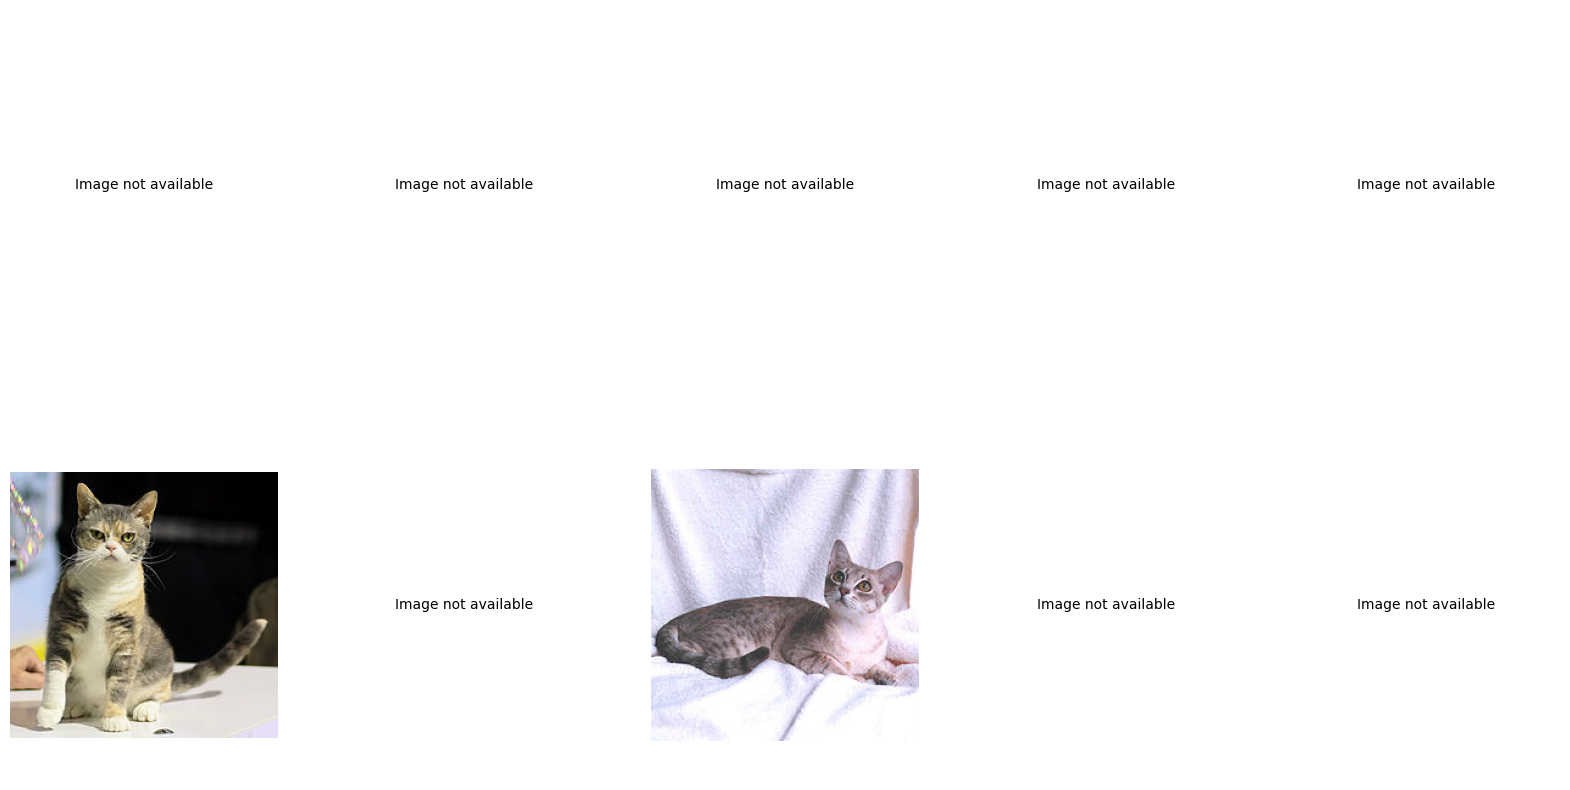

In [63]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Assuming df is already loaded, select the first 10 URLs
urls = df['wikipedia_url'][:10]

# Function to extract image URL from a Wikipedia page
def get_image_url(wikipedia_url):
    response = requests.get(wikipedia_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    infobox = soup.find('table', {'class': 'infobox'})
    img_tag = infobox.find('img')
    img_url = 'https:' + img_tag['src']
    return img_url

# Function to fetch an image from a URL
def fetch_image(img_url):
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    return img

# List to store images
images = []

# Extract image URLs and fetch images
for url in urls:
    try:
        img_url = get_image_url(url)
        img = fetch_image(img_url)
        images.append(img)
    except Exception as e:
        print(f"Failed to fetch image from {url}: {e}")
        images.append(None)  # Placeholder for missing image

# Plotting the images
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for i, ax in enumerate(axs.flatten()):
    if images[i] is not None:
        ax.imshow(images[i])
        ax.axis('off')
    else:
        ax.text(0.5, 0.5, 'Image not available', horizontalalignment='center', verticalalignment='center')
        ax.axis('off')

plt.show()

### **3. 반드시 10 장의 고양이 이미지를 그려보기**

Failed to fetch image from https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Face_et_profil_du_korat.JPG/220px-Face_et_profil_du_korat.JPG: cannot identify image file <_io.BytesIO object at 0x7d43ac667ec0>
Failed to fetch image from https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Tonkinese_Cat_-_Leo.jpg/220px-Tonkinese_Cat_-_Leo.jpg: cannot identify image file <_io.BytesIO object at 0x7d43ac667b50>
Failed to fetch image from https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Dragon_Li_Cat_named_Pipi.jpg/220px-Dragon_Li_Cat_named_Pipi.jpg: cannot identify image file <_io.BytesIO object at 0x7d43ac53e890>
Failed to fetch image from https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/IC_Blue_Melody_Flipper_CHA_male_EX1_CACIB.jpg/220px-IC_Blue_Melody_Flipper_CHA_male_EX1_CACIB.jpg: cannot identify image file <_io.BytesIO object at 0x7d43acd0e750>
Failed to fetch image from https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Havana_Brown.png/220px-Havana

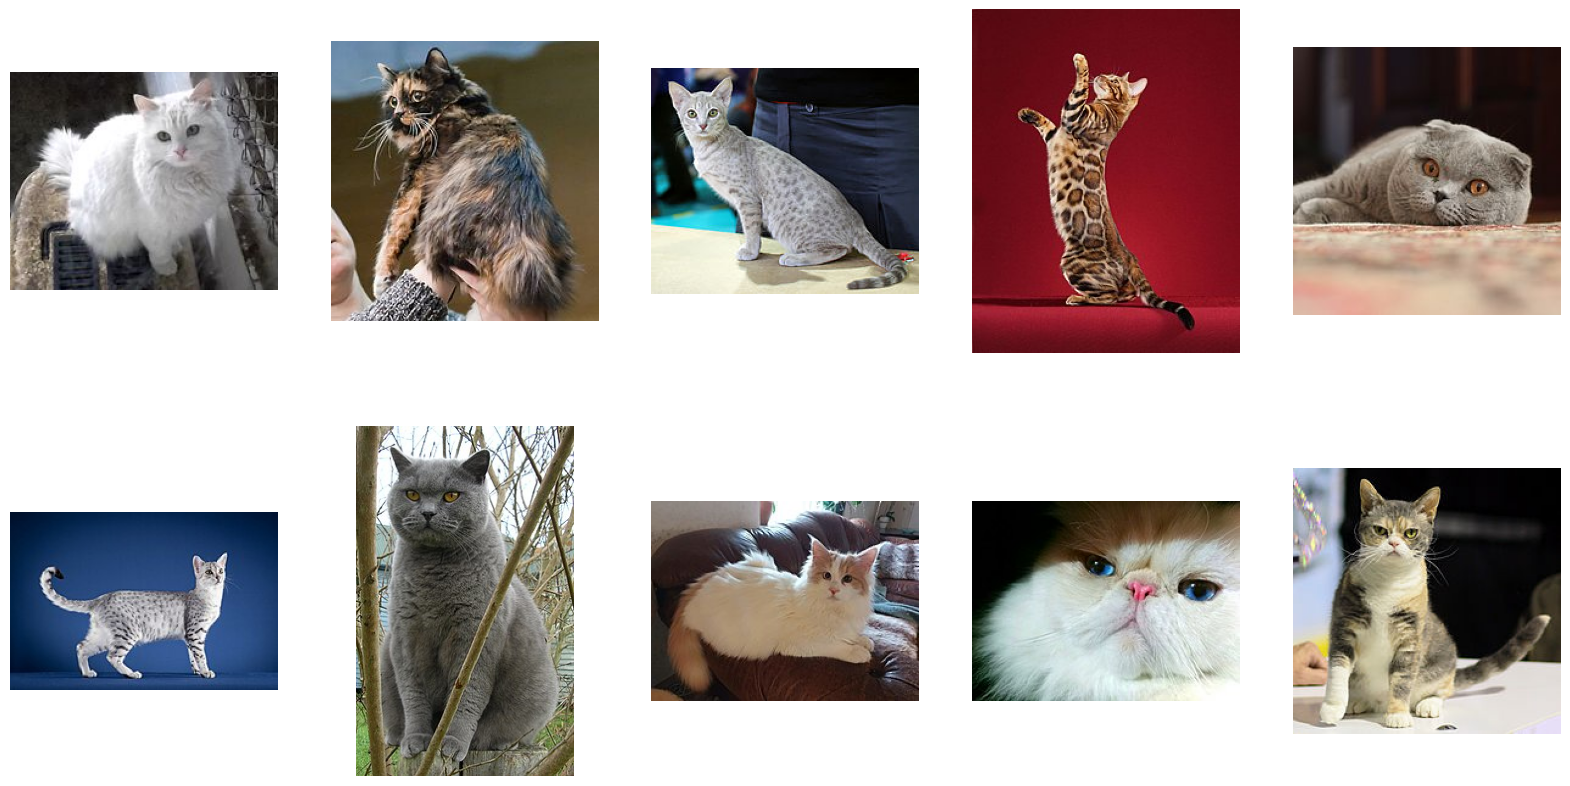

In [65]:
import random

# Assuming df is already loaded
urls = df['wikipedia_url'].tolist()
random.shuffle(urls)  # Shuffle the URLs randomly

# Function to extract image URL from a Wikipedia page
def get_image_url(wikipedia_url):
    try:
        response = requests.get(wikipedia_url)
        soup = BeautifulSoup(response.text, 'html.parser')
        infobox = soup.find('table', {'class': 'infobox'})
        if infobox:
            img_tag = infobox.find('img')
            if img_tag:
                img_url = 'https:' + img_tag['src']
                return img_url
    except Exception as e:
        print(f"Failed to fetch image URL from {wikipedia_url}: {e}")
    return None

# Function to fetch an image from a URL
def fetch_image(img_url):
    try:
        response = requests.get(img_url)
        img = Image.open(BytesIO(response.content))
        return img
    except Exception as e:
        print(f"Failed to fetch image from {img_url}: {e}")
        return None

# List to store images
images = []

# Extract image URLs and fetch images until we have 10
for url in urls:
    if len(images) >= 10:
        break
    img_url = get_image_url(url)
    if img_url:
        img = fetch_image(img_url)
        if img:
            images.append(img)

# Plotting the images
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for i, ax in enumerate(axs.flatten()):
    if i < len(images):
        ax.imshow(images[i])
        ax.axis('off')
    else:
        ax.axis('off')  # Turn off axis for unused subplots

plt.show()
